
# **Logistic Regression and Regularization**

In this assignment, you need to complete the following two sections:
1. Logistic regression
2. Regularization

### Please Write Your VT PID Here: 906388880

## Environment Set Up

Mount your google drive in google colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import sys
import os


customized_path_to_your_file = '/content/gdrive/MyDrive/your_file'
sys.path.append(customized_path_to_your_file)

## Logistic Regression

In [ ]:
import os
logistic_x_data_path = os.path.join(customized_path_to_your_data, 'data/logistic_x_.txt')
logistic_y_data_path = os.path.join(customized_path_to_your_data, 'data/logistic_y_.txt')

In [ ]:
def feature_normalize(X):
    mu     = 0
    sigma  = 0
    mu     = np.mean(X, 0)
    sigma  = np.std(X, 0)
    X      = (X - mu) / sigma
    X_norm = X
  
    return X_norm, mu, sigma

In [ ]:
import numpy as np

X = np.loadtxt(logistic_x_data_path) 
y = np.loadtxt(logistic_y_data_path).reshape(-1, 1) 

X, mu, std = feature_normalize(X)

# Add a column of ones to X for the bias weight.
m = len(X)
X = np.concatenate((np.ones((m, 1)), X), axis=1)
#print(X.shape)
#print(y.shape)

Here, the input $x^{(i)}\in\mathbb{R^2}$ and $y^{(i)}\in\{-1, 1\}$. Like we have mentioned, it is better to visualize the data first before we start working on it.

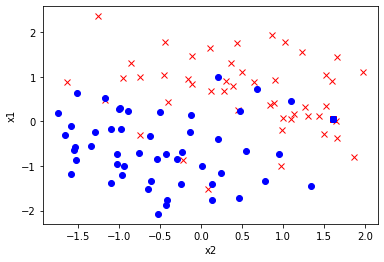

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X[np.where(y==1), 1], X[np.where(y==1), 2], 'rx')
plt.plot(X[np.where(y==-1), 1], X[np.where(y==-1), 2], 'bo')  
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()

In the following, you need to implement logistic regression. Recall that when $y^{(i)}\in{-1,1}$, the objective function for binary logistic regression can be expressed as:
\begin{equation*}
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\log{\left(1+e^{-y^{(i)}\theta^Tx^{(i)}}\right)}=-\frac{1}{m}\sum_{i=1}^m\log{\left(h_{\theta}(y^{(i)}x^{(i)})\right)}
\end{equation*}
where the hypothesis is the **sigmoid function**: 
\begin{equation*}
h_\theta(y^{(i)}x^{(i)})=\frac{1}{1+e^{-y^{(i)}\theta^{T}x^{(i)}}}
\end{equation*}
which we have seen in class (and assignment 0). Similar to the previous section, we can minimize the objective function $J(\theta)$ using  batch gradient descent:
\begin{equation*}
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}h_\theta(-y^{(i)}x^{(i)})(-y^{(i)}x_j^{(i)})
\end{equation*}

In [ ]:
def sigmoid(z):
    g  = 1/(1+np.exp(-z))
    return g

def compute_cost(X, y, theta):
    J = 0;
    m = y.size
    h = sigmoid(y*np.dot(X,theta))
    epsilon = 1e-5
    J = -1*(1/m)*(np.sum(np.log(h)))
    return J

def compute_gradient(X, y, theta):
    m = y.size
    h = sigmoid(y*np.dot(X,theta))
    gradient_=(1/m)*np.sum(sigmoid(-y*np.dot(X, theta))*X*y,axis = 0).reshape(-1,1)
    return gradient_


def gradient_descent_logistic(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for iter in range(num_iters):
        grad = compute_gradient(X,y,theta)
        theta = theta + (alpha * grad)
        pass
        # Save the cost J in every iteration 
        J = compute_cost(X, y, theta)
        print(J)
        J_history.append(J)
    
    return theta, J_history

Now, fit your model, and see if it is learning.

In [ ]:
# Train your model.
theta = np.zeros((X.shape[1], 1))
alpha = 0.1;
num_iters = 400;
theta, J_history = gradient_descent_logistic(X, y, theta, alpha, num_iters)


0.6767318709516238
0.6612759836177738
0.6467213868522412
0.6330122173560181
0.6200951054326651
0.6079193220430319
0.5964368590615188
0.5856024539525343
0.5753735694532693
0.565710337891584
0.5565754786361017
0.5479341959843038
0.5397540636253004
0.5320049007207323
0.5246586436612436
0.517689216691671
0.5110724038582442
0.5047857241105058
0.4988083108795615
0.4931207970404286
0.4877052058366674
0.4825448480874091
0.47762422579843516
0.4729289421494971
0.4684456177202448
0.46416181273904
0.4600659550858426
0.45614727374678166
0.4523957373993958
0.4488019978002129
0.44535733764742047
0.44205362259850367
0.4388832571341371
0.43583914397384127
0.4329146467649332
0.43010355578324566
0.42740005640139334
0.4247987000975499
0.4222943777944718
0.4198822953346259
0.417557950912616
0.4153171143005741
0.4131558077157223
0.4110702881919316
0.4090570313288082
0.40711271630263857
0.40523421203348253
0.4034185644118437
0.40166298449673493
0.39996483760461843
0.3983216332157216
0.39673101563062574
0.395

Again, plot and check to see if the model is converging.

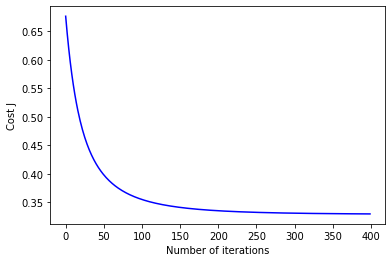

In [ ]:
plt.plot(list(range(0, len(J_history))), J_history, '-b')  
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

## Decision Boundary
In addition to checking convergence graph and accuracy, we can also plot out the decision boundary to see what does the model actually learn.

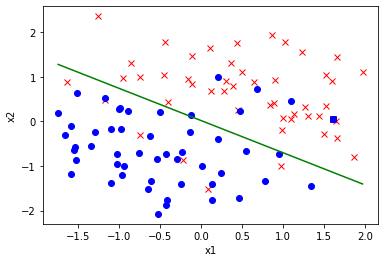

In [ ]:

plt.plot(X[np.where(y==1), 1], X[np.where(y==1), 2], 'rx')
plt.plot(X[np.where(y==-1), 1], X[np.where(y==-1), 2], 'bo')

x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "-", c = 'green' )
pass

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Regularization:

## L2 Regularization
Overfitting is a notorious problem in the world of machine learning. One simple way to counter this issue is to put constraints on your model weights $\theta$, as we have discussed in class. In this section, you need to modify the the objective function to impose L2 regularization on the logistic regression:
\begin{equation*}
    J(\theta) = -\frac{1}{m}\sum_{i=1}^m\log{\left(h_{\theta}(y^{(i)}x^{(i)})\right)} + \lambda\vert\vert\theta\vert\vert_2^2
\end{equation*}



In [ ]:
class LogisticRegression(object):
    
    def __init__(self, alpha=0.1, lamb=0.1, regularization=None):
        # setting the class attribute.
        self.alpha = alpha                   # Set up your learning rate alpha.
        self.lamb = lamb                     # Strength of regularization.
        self.regularization = regularization 
        assert regularization == 'l2' or regularization == None # we only consider these two cases
    
    def _compute_cost(self, X, y):
        eps = 1e-10
        #m = len(y)
        h = sigmoid(y*np.dot(X,self.theta))
        if self.regularization == 'l2':
            h = sigmoid(y*np.dot(X,self.theta))
            J = -1*(1/m)*(np.sum(np.log(h + eps))) + self.lamb * np.square((np.linalg.norm(self.theta)))
        else:
            h = sigmoid(y*np.dot(X,self.theta))
            J = -1*(1/m)*(np.sum(np.log(h + eps)))

        pass
        return J
        
    def _compute_gradient(self, X, y):
        if self.regularization == 'l2':
            grad = np.dot((-1 * y * X).T, sigmoid(-y * np.dot(X,self.theta))) + self.lamb*2*self.theta
        else:
            grad = np.dot((-1 * y * X).T, sigmoid(-y * np.dot(X,self.theta)))
        pass
        return grad

    def fit(self, X, y, num_iter=5):
        self.theta = np.zeros((X.shape[1], 1))
        m = len(y)
        J_history = []

        for iter in range(num_iters):
            self.theta = self.theta - (self.alpha/m) * self._compute_gradient(X,y)

            J = self._compute_cost(X, y)
            J_history.append(J)
        pass

        return J_history
    
    def predict(self, X):
        y_hat = sigmoid(np.dot(X,self.theta))

        return y_hat

Load the wine datasets, in which $x_j\in\mathbb{R}^{12}$ is different attribute for alcohol, and $y\in\{-1,1\}$ is that class label (red or white wine).

In [ ]:
# Load dataset
import numpy as np
X_train = np.loadtxt(os.path.join(customized_path_to_your_data, 'data/wine_train_X.txt'))
y_train = np.loadtxt(os.path.join(customized_path_to_your_data, 'data/wine_train_y.txt')).reshape(-1, 1)
X_test = np.loadtxt(os.path.join(customized_path_to_your_data, 'data/wine_test_X.txt'))
y_test = np.loadtxt(os.path.join(customized_path_to_your_data, 'data/wine_test_y.txt')).reshape(-1, 1)

# X_train, mu, std = feature_normalize(X_train)
# X_test, mu, std = feature_normalize(X_test)

X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

Now, let's train two different logistic regression models: one with, and one without regularization.

In [ ]:
log_reg = LogisticRegression(alpha=0.1) # Without regularization
log_reg_l2 = LogisticRegression(alpha=0.1, lamb=1.0, regularization='l2') # Without regularization

J_history = log_reg.fit(X_train, y_train, num_iter=500)
J_history_l2 = log_reg_l2.fit(X_train, y_train, num_iter=500)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Next, we evaluate the accuracy for each method:

In [ ]:
def evaluate_accuracy(X, y, model):
    y_pred = model.predict(X)
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = -1
    return np.mean(y_pred == y)

print("Accuracy on training set: ", evaluate_accuracy(X_train, y_train, log_reg))
print("Accuracy on testing set: ", evaluate_accuracy(X_test, y_test, log_reg))
print("Accuracy w/ L2 training set: ", evaluate_accuracy(X_train, y_train, log_reg_l2))
print("Accuracy w/ L2 testing set: ", evaluate_accuracy(X_test, y_test, log_reg_l2))

Accuracy on training set:  0.81375
Accuracy on testing set:  0.8575
Accuracy w/ L2 training set:  0.77125
Accuracy w/ L2 testing set:  0.7725


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


To see the effect of regularization on $\theta$, we can plot out each $\theta_j$ under different $\lambda$.

In [ ]:
def plot_theta(theta, lamb):
    """
    Helper function for plotting out the value of theta with respect to different lambda.
    theta  (list): list of theta under different lambda.
    lambda (list): list of lambda values you tried.
    """
    plt.hlines(y=0, xmin=0, xmax=np.max(lamb), color='red', linewidth = 2, linestyle = '--')
    for i in range(theta.shape[1]):
        plt.plot(lamb, theta[:,i])
    plt.ylabel('theta')
    plt.xlabel('lambda')
    plt.xscale('log')
    plt.show()

## Plot:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


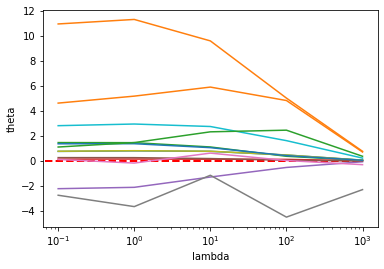

In [ ]:
lamb = [0.1, 1, 10, 100, 1000]
theta = []

for l in lamb:
    LR = LogisticRegression(alpha= 0.1,lamb=l, regularization="l2")
    LR.fit(X_train, y_train, num_iter=500)
    theta.append(LR.theta)

plot_theta(np.array(theta), lamb)